In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec

%load_ext tikzmagic

# f-divergence
Let $P$ and $Q$ be two probability distributions over a space $\Omega$, such that $P \ll Q$, that is, $P$ is absolutely continuous with respect to $Q$. Then, for a convex function $f: [0,\inf) \rightarrow (-\inf, \inf]$ such that $f(x)$ is finite for all $x > 0$, $f(1) = 0$, and $f(0) = \lim_{t \to o^+} f(t)$, the f-divergence of $P$ from $Q$ is defined as
$$
    D_f(P \Vert Q) \equiv \int\limits_\Omega f \left( \frac{dP}{dQ} \right) dQ.
$$
$f$ is called the generator of $D_f$. The following generator functions exist:
$$
\begin{array}{l|l}
    \text{\textbf{Divergence}} & \mathbf{f(t)} \\
    \hline
    \text{Total variation distance} & \frac{1}{2} \vert t - 1 \vert \\ \hline
    \alpha\text{-divergence} & \left\{ \begin{array}{cl}
        \cfrac{ t^\alpha - \alpha t - (1 - \alpha) }{ \alpha ( \alpha -1 ) }, & \text{if } \alpha \neq 0, \alpha \neq 1, \\
        t \ln(t) - t + 1, & \text{if } \alpha = 1, \\ \hline
        - \ln(t) + t - 1, & \text{if } \alpha = 0
    \end{array} \right. \\ \hline
    \text{KL-divergence } (\alpha = 1) & t \ln(t) \\ \hline
    \text{reverse KL-divergence } (\alpha = 0) & - \ln(t)
\end{array}
$$

# Kullback–Leibler divergence
$$
    D_{KL} (P \Vert Q) = \int\limits_{x_a}^{x_b} P(x) \log \left( \cfrac{P(x)}{Q(x)} \right) dx
$$

In [2]:
def kullback(mu0, var0, mu1, var1):
    return 0.5 * (
        var0 / var1 + (mu1 - mu0)**2 / var1 - 1 + 2 * np.log( np.sqrt(var1 / var0) )
    )

## Properties

### Non-negative

### No upper bound

### Relative entropy is additive
$$
    D_{KL} (P \Vert Q) = D_{KL} (P_1 \Vert Q_1) + D_{KL} (P_2 \Vert Q_2)
$$

## Examples

#### Interpolation $\mu \in \mathbb{R}, \sigma = c$

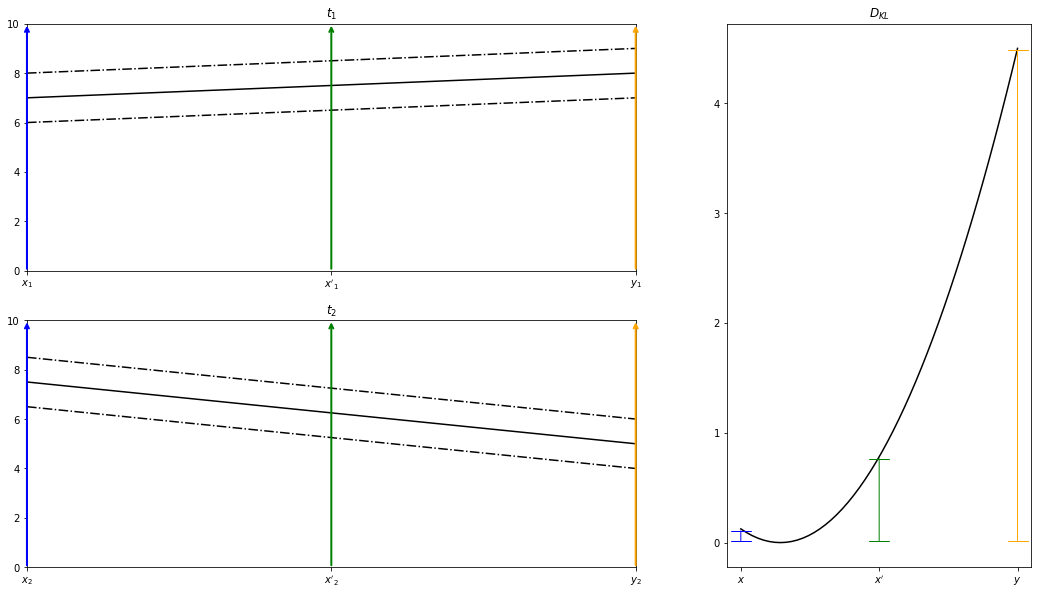

In [3]:

# t1
mu_x1 = 7
sigma_x1 = 1.0

mu_y1 = 8
sigma_y1 = 1-0

# linear interpolation: c + m * z; m = dt/dz; dz = 1
mu_dash1 = mu_x1 + (mu_y1 - mu_x1) * 0.5 
sigma_dash1 = sigma_x1 + (sigma_y1 - sigma_x1) * 0.5

# t2
mu_x2 = 7.5
sigma_x2 = 1

mu_y2 = 5
sigma_y2 = 1

mu_dash2 = mu_x2 + (mu_y2 - mu_x2) * 0.5
sigma_dash2 = sigma_x2 + (sigma_y2 - sigma_x2) * 0.5

# KL-divergence
D_x = kullback(mu_x1, sigma_x1**2, mu_x2, sigma_x2**2)
D_y = kullback(mu_y1, sigma_y1**2, mu_y2, sigma_y2**2)
D_x_dash = kullback(mu_dash1, sigma_dash1**2, mu_dash2, sigma_dash2**2)

mu_rolling_t1 = np.linspace(mu_x1, mu_y1)
sigma_rolling_t1 = np.linspace(sigma_x1, sigma_y1)

mu_rolling_t2 = np.linspace(mu_x2, mu_y2)
sigma_rolling_t2 = np.linspace(sigma_x2, sigma_y2)

D_rolling = kullback(mu_rolling_t1, sigma_rolling_t1**2, mu_rolling_t2, sigma_rolling_t2**2)

# drawing #
t = np.linspace(-3,4)

fig = plt.figure(figsize=(18,10))
gs = GridSpec(2,2, width_ratios=[2,1])
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[:,1])

ax1.set_title(r'$t_1$')
ax1.plot(np.linspace(0,1), mu_rolling_t1, c='k')
ax1.plot(np.linspace(0,1), mu_rolling_t1 + sigma_rolling_t1, 'k-.')
ax1.plot(np.linspace(0,1), mu_rolling_t1 - sigma_rolling_t1, 'k-.')
ax1.annotate(r'', xy=[0, 10], xycoords='data', xytext=[0, 0], arrowprops=dict(fc='blue', ec='blue', arrowstyle='->', lw=2))
ax1.annotate(r'', xy=[0.5, 10], xycoords='data', xytext=[0.5, 0], arrowprops=dict(fc='green', ec='green', arrowstyle='->', lw=2))
ax1.annotate(r'', xy=[1, 10], xycoords='data', xytext=[1, 0], arrowprops=dict(fc='orange', ec='orange', arrowstyle='->', lw=2))
ax1.set_xticks([0,0.5,1], [r'$x_1$', r"$x'_1$", r'$y_1$'])
ax1.set_ylim(0, 10)
ax1.set_xlim(0, 1)

ax2.set_title(r'$t_2$')
ax2.plot(np.linspace(0,1), mu_rolling_t2, c='k')
ax2.plot(np.linspace(0,1), mu_rolling_t2 + sigma_rolling_t2, 'k-.')
ax2.plot(np.linspace(0,1), mu_rolling_t2 - sigma_rolling_t2, 'k-.')
ax2.annotate(r'', xy=[0, 10], xycoords='data', xytext=[0, 0], arrowprops=dict(fc='blue', ec='blue', arrowstyle='->', lw=2))
ax2.annotate(r'', xy=[0.5, 10], xycoords='data', xytext=[0.5, 0], arrowprops=dict(fc='green', ec='green', arrowstyle='->', lw=2))
ax2.annotate(r'', xy=[1, 10], xycoords='data', xytext=[1, 0], arrowprops=dict(fc='orange', ec='orange', arrowstyle='->', lw=2))
ax2.set_xticks([0,0.5,1], [r'$x_2$', r"$x'_2$", r'$y_2$'])
ax2.set_ylim(0, 10)
ax2.set_xlim(0, 1)

ax3.set_title(r'$D_{KL}$')
plt.plot(np.linspace(0,1), D_rolling, c='k')
ax3.annotate('', xy=[0, D_x], xycoords='data', xytext=[0, 0], arrowprops=dict(fc='blue', ec='blue', arrowstyle='|-|'))
ax3.annotate('', xy=[0.5, D_x_dash], xycoords='data', xytext=[0.5, 0], arrowprops=dict(fc='green', ec='green', arrowstyle='|-|'))
ax3.annotate('', xy=[1, D_y], xycoords='data', xytext=[1, 0], arrowprops=dict(fc='orange', ec='orange', arrowstyle='|-|'))
# ax3.set_xlim(-0.5, 1.5)
ax3.set_xticks([0, 0.5, 1], [r'$x$', r"$x'$", r'$y$'])
# ax3.set_ylim(-0.05, 0.6)

plt.show()


#### Interpolation $\mu = c, \sigma \in \mathbb{R}$

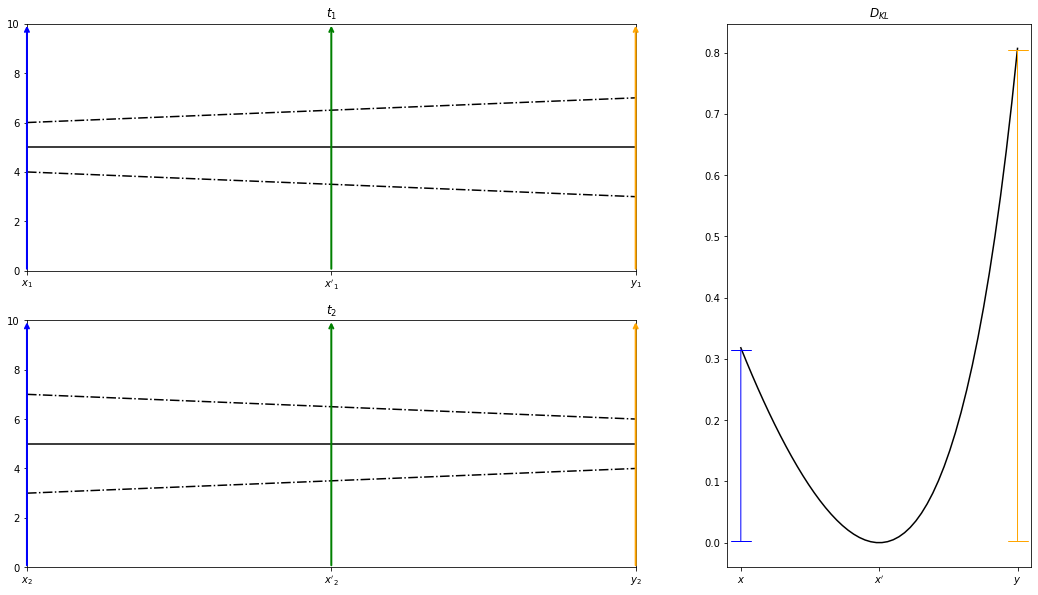

In [4]:

# t1
mu_x1 = 5
sigma_x1 = 1.0

mu_y1 = 5
sigma_y1 = 2-0

# linear interpolation: c + m * z; m = dt/dz; dz = 1
mu_dash1 = mu_x1 + (mu_y1 - mu_x1) * 0.5 
sigma_dash1 = sigma_x1 + (sigma_y1 - sigma_x1) * 0.5

# t2
mu_x2 = 5
sigma_x2 = 2

mu_y2 = 5
sigma_y2 = 1

mu_dash2 = mu_x2 + (mu_y2 - mu_x2) * 0.5
sigma_dash2 = sigma_x2 + (sigma_y2 - sigma_x2) * 0.5

# KL-divergence
D_x = kullback(mu_x1, sigma_x1**2, mu_x2, sigma_x2**2)
D_y = kullback(mu_y1, sigma_y1**2, mu_y2, sigma_y2**2)
D_x_dash = kullback(mu_dash1, sigma_dash1**2, mu_dash2, sigma_dash2**2)

mu_rolling_t1 = np.linspace(mu_x1, mu_y1)
sigma_rolling_t1 = np.linspace(sigma_x1, sigma_y1)

mu_rolling_t2 = np.linspace(mu_x2, mu_y2)
sigma_rolling_t2 = np.linspace(sigma_x2, sigma_y2)

D_rolling = kullback(mu_rolling_t1, sigma_rolling_t1**2, mu_rolling_t2, sigma_rolling_t2**2)

# drawing #

t = np.linspace(-3,4)

fig = plt.figure(figsize=(18,10))
gs = GridSpec(2,2, width_ratios=[2,1])
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[:,1])

ax1.set_title(r'$t_1$')
ax1.plot(np.linspace(0,1), mu_rolling_t1, c='k')
ax1.plot(np.linspace(0,1), mu_rolling_t1 + sigma_rolling_t1, 'k-.')
ax1.plot(np.linspace(0,1), mu_rolling_t1 - sigma_rolling_t1, 'k-.')
ax1.annotate(r'', xy=[0, 10], xycoords='data', xytext=[0, 0], arrowprops=dict(fc='blue', ec='blue', arrowstyle='->', lw=2))
ax1.annotate(r'', xy=[0.5, 10], xycoords='data', xytext=[0.5, 0], arrowprops=dict(fc='green', ec='green', arrowstyle='->', lw=2))
ax1.annotate(r'', xy=[1, 10], xycoords='data', xytext=[1, 0], arrowprops=dict(fc='orange', ec='orange', arrowstyle='->', lw=2))
ax1.set_xticks([0,0.5,1], [r'$x_1$', r"$x'_1$", r'$y_1$'])
ax1.set_ylim(0, 10)
ax1.set_xlim(0, 1)

ax2.set_title(r'$t_2$')
ax2.plot(np.linspace(0,1), mu_rolling_t2, c='k')
ax2.plot(np.linspace(0,1), mu_rolling_t2 + sigma_rolling_t2, 'k-.')
ax2.plot(np.linspace(0,1), mu_rolling_t2 - sigma_rolling_t2, 'k-.')
ax2.annotate(r'', xy=[0, 10], xycoords='data', xytext=[0, 0], arrowprops=dict(fc='blue', ec='blue', arrowstyle='->', lw=2))
ax2.annotate(r'', xy=[0.5, 10], xycoords='data', xytext=[0.5, 0], arrowprops=dict(fc='green', ec='green', arrowstyle='->', lw=2))
ax2.annotate(r'', xy=[1, 10], xycoords='data', xytext=[1, 0], arrowprops=dict(fc='orange', ec='orange', arrowstyle='->', lw=2))
ax2.set_xticks([0,0.5,1], [r'$x_2$', r"$x'_2$", r'$y_2$'])
ax2.set_ylim(0, 10)
ax2.set_xlim(0, 1)

ax3.set_title(r'$D_{KL}$')
plt.plot(np.linspace(0,1), D_rolling, c='k')
ax3.annotate('', xy=[0, D_x], xycoords='data', xytext=[0, 0], arrowprops=dict(fc='blue', ec='blue', arrowstyle='|-|'))
ax3.annotate('', xy=[0.5, D_x_dash], xycoords='data', xytext=[0.5, 0], arrowprops=dict(fc='green', ec='green', arrowstyle='|-|'))
ax3.annotate('', xy=[1, D_y], xycoords='data', xytext=[1, 0], arrowprops=dict(fc='orange', ec='orange', arrowstyle='|-|'))
# ax3.set_xlim(-0.5, 1.5)
ax3.set_xticks([0, 0.5, 1], [r'$x$', r"$x'$", r'$y$'])
# ax3.set_ylim(-0.05, 0.6)

plt.show()


#### Interpolation $\mu, \sigma \in \mathbb{R}$

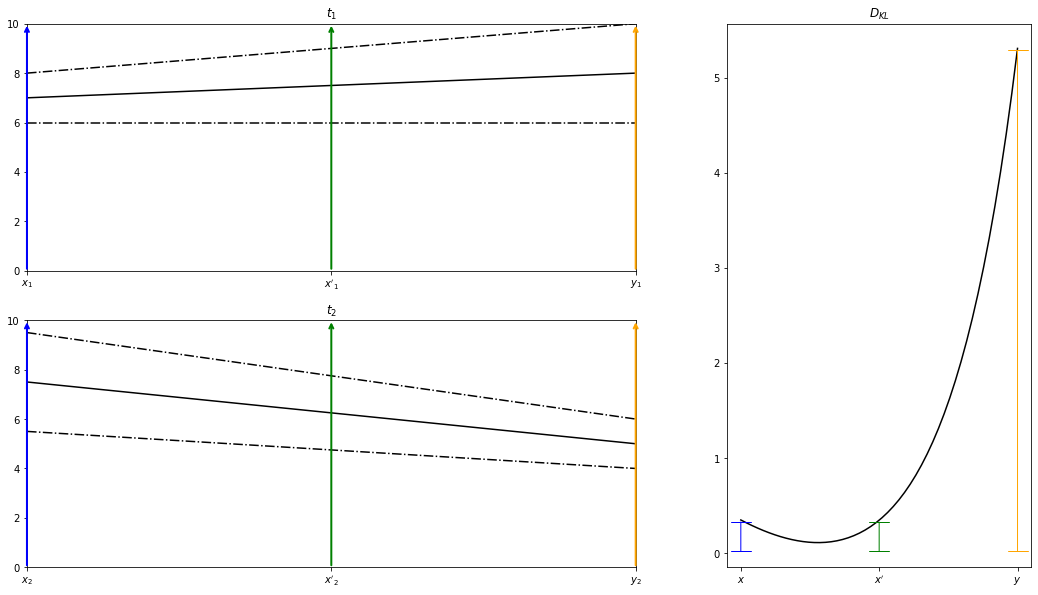

In [5]:
# t1
mu_x1 = 7
sigma_x1 = 1.0

mu_y1 = 8
sigma_y1 = 2-0

# linear interpolation: c + m * z; m = dt/dz; dz = 1
mu_dash1 = mu_x1 + (mu_y1 - mu_x1) * 0.5 
sigma_dash1 = sigma_x1 + (sigma_y1 - sigma_x1) * 0.5

# t2
mu_x2 = 7.5
sigma_x2 = 2

mu_y2 = 5
sigma_y2 = 1

mu_dash2 = mu_x2 + (mu_y2 - mu_x2) * 0.5
sigma_dash2 = sigma_x2 + (sigma_y2 - sigma_x2) * 0.5

# KL-divergence
D_x = kullback(mu_x1, sigma_x1**2, mu_x2, sigma_x2**2)
D_y = kullback(mu_y1, sigma_y1**2, mu_y2, sigma_y2**2)
D_x_dash = kullback(mu_dash1, sigma_dash1**2, mu_dash2, sigma_dash2**2)

mu_rolling_t1 = np.linspace(mu_x1, mu_y1)
sigma_rolling_t1 = np.linspace(sigma_x1, sigma_y1)

mu_rolling_t2 = np.linspace(mu_x2, mu_y2)
sigma_rolling_t2 = np.linspace(sigma_x2, sigma_y2)

D_rolling = kullback(mu_rolling_t1, sigma_rolling_t1**2, mu_rolling_t2, sigma_rolling_t2**2)

# drawing #

t = np.linspace(-3,4)

fig = plt.figure(figsize=(18,10))
gs = GridSpec(2,2, width_ratios=[2,1])
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[:,1])

ax1.set_title(r'$t_1$')
ax1.plot(np.linspace(0,1), mu_rolling_t1, c='k')
ax1.plot(np.linspace(0,1), mu_rolling_t1 + sigma_rolling_t1, 'k-.')
ax1.plot(np.linspace(0,1), mu_rolling_t1 - sigma_rolling_t1, 'k-.')
ax1.annotate(r'', xy=[0, 10], xycoords='data', xytext=[0, 0], arrowprops=dict(fc='blue', ec='blue', arrowstyle='->', lw=2))
ax1.annotate(r'', xy=[0.5, 10], xycoords='data', xytext=[0.5, 0], arrowprops=dict(fc='green', ec='green', arrowstyle='->', lw=2))
ax1.annotate(r'', xy=[1, 10], xycoords='data', xytext=[1, 0], arrowprops=dict(fc='orange', ec='orange', arrowstyle='->', lw=2))
ax1.set_xticks([0,0.5,1], [r'$x_1$', r"$x'_1$", r'$y_1$'])
ax1.set_ylim(0, 10)
ax1.set_xlim(0, 1)

ax2.set_title(r'$t_2$')
ax2.plot(np.linspace(0,1), mu_rolling_t2, c='k')
ax2.plot(np.linspace(0,1), mu_rolling_t2 + sigma_rolling_t2, 'k-.')
ax2.plot(np.linspace(0,1), mu_rolling_t2 - sigma_rolling_t2, 'k-.')
ax2.annotate(r'', xy=[0, 10], xycoords='data', xytext=[0, 0], arrowprops=dict(fc='blue', ec='blue', arrowstyle='->', lw=2))
ax2.annotate(r'', xy=[0.5, 10], xycoords='data', xytext=[0.5, 0], arrowprops=dict(fc='green', ec='green', arrowstyle='->', lw=2))
ax2.annotate(r'', xy=[1, 10], xycoords='data', xytext=[1, 0], arrowprops=dict(fc='orange', ec='orange', arrowstyle='->', lw=2))
ax2.set_xticks([0,0.5,1], [r'$x_2$', r"$x'_2$", r'$y_2$'])
ax2.set_ylim(0, 10)
ax2.set_xlim(0, 1)

ax3.set_title(r'$D_{KL}$')
plt.plot(np.linspace(0,1), D_rolling, c='k')
ax3.annotate('', xy=[0, D_x], xycoords='data', xytext=[0, 0], arrowprops=dict(fc='blue', ec='blue', arrowstyle='|-|'))
ax3.annotate('', xy=[0.5, D_x_dash], xycoords='data', xytext=[0.5, 0], arrowprops=dict(fc='green', ec='green', arrowstyle='|-|'))
ax3.annotate('', xy=[1, D_y], xycoords='data', xytext=[1, 0], arrowprops=dict(fc='orange', ec='orange', arrowstyle='|-|'))
# ax3.set_xlim(-0.5, 1.5)
ax3.set_xticks([0, 0.5, 1], [r'$x$', r"$x'$", r'$y$'])
# ax3.set_ylim(-0.05, 0.6)

plt.show()


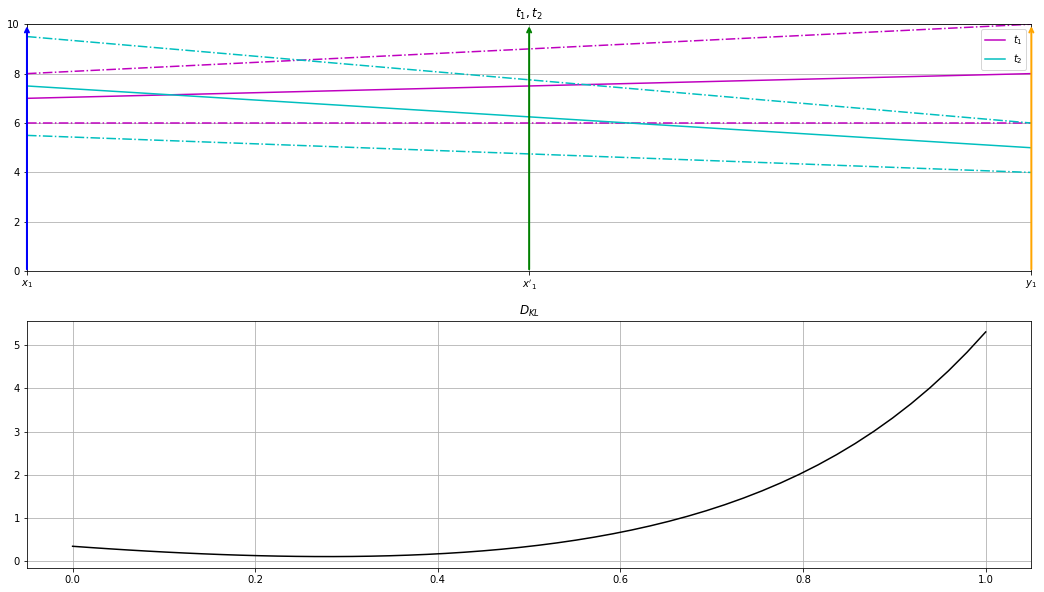

In [8]:
plt.figure(figsize=(18,10))
plt.subplot(2,1,1)
plt.title(r'$t_1,t_2$')

line1 = plt.plot(np.linspace(0,1), mu_rolling_t1, c='m')
plt.plot(np.linspace(0,1), mu_rolling_t1 + sigma_rolling_t1, 'm-.')
plt.plot(np.linspace(0,1), mu_rolling_t1 - sigma_rolling_t1, 'm-.')

line2 = plt.plot(np.linspace(0,1), mu_rolling_t2, c='c')
plt.plot(np.linspace(0,1), mu_rolling_t2 + sigma_rolling_t2, 'c-.')
plt.plot(np.linspace(0,1), mu_rolling_t2 - sigma_rolling_t2, 'c-.')
plt.annotate(r'', xy=[0, 10], xycoords='data', xytext=[0, 0], arrowprops=dict(fc='blue', ec='blue', arrowstyle='->', lw=2))
plt.annotate(r'', xy=[0.5, 10], xycoords='data', xytext=[0.5, 0], arrowprops=dict(fc='green', ec='green', arrowstyle='->', lw=2))
plt.annotate(r'', xy=[1, 10], xycoords='data', xytext=[1, 0], arrowprops=dict(fc='orange', ec='orange', arrowstyle='->', lw=2))
plt.xticks([0,0.5,1], [r'$x_1$', r"$x'_1$", r'$y_1$'])
plt.ylim(0, 10)
plt.xlim(0, 1)

plt.legend(line1 + line2, [r'$t_1$', r'$t_2$'])
plt.grid()

plt.subplot(2,1,2)
plt.title(r'$D_{KL}$')
plt.plot(np.linspace(0,1), D_rolling, c='k')
plt.grid()

plt.show()


# Counter example

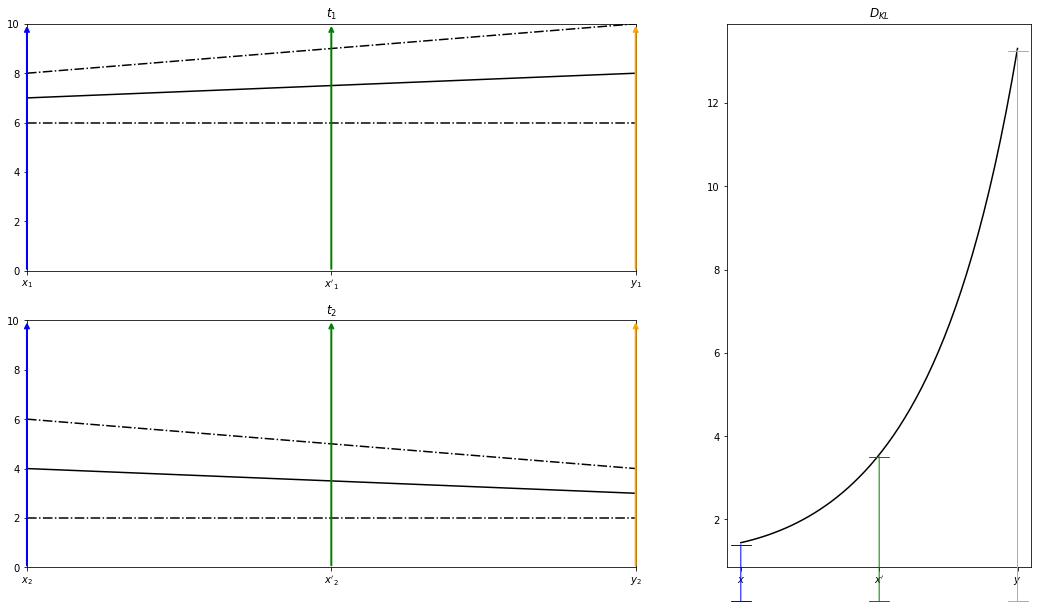

In [10]:
# t1
mu_x1 = 7
sigma_x1 = 1.0

mu_y1 = 8
sigma_y1 = 2-0

# linear interpolation: c + m * z; m = dt/dz; dz = 1
mu_dash1 = mu_x1 + (mu_y1 - mu_x1) * 0.5 
sigma_dash1 = sigma_x1 + (sigma_y1 - sigma_x1) * 0.5

# t2
mu_x2 = 4
sigma_x2 = 2

mu_y2 = 3
sigma_y2 = 1

mu_dash2 = mu_x2 + (mu_y2 - mu_x2) * 0.5
sigma_dash2 = sigma_x2 + (sigma_y2 - sigma_x2) * 0.5

# KL-divergence
D_x = kullback(mu_x1, sigma_x1**2, mu_x2, sigma_x2**2)
D_y = kullback(mu_y1, sigma_y1**2, mu_y2, sigma_y2**2)
D_x_dash = kullback(mu_dash1, sigma_dash1**2, mu_dash2, sigma_dash2**2)

mu_rolling_t1 = np.linspace(mu_x1, mu_y1)
sigma_rolling_t1 = np.linspace(sigma_x1, sigma_y1)

mu_rolling_t2 = np.linspace(mu_x2, mu_y2)
sigma_rolling_t2 = np.linspace(sigma_x2, sigma_y2)

D_rolling = kullback(mu_rolling_t1, sigma_rolling_t1**2, mu_rolling_t2, sigma_rolling_t2**2)

# drawing #

t = np.linspace(-3,4)

fig = plt.figure(figsize=(18,10))
gs = GridSpec(2,2, width_ratios=[2,1])
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[:,1])

ax1.set_title(r'$t_1$')
ax1.plot(np.linspace(0,1), mu_rolling_t1, c='k')
ax1.plot(np.linspace(0,1), mu_rolling_t1 + sigma_rolling_t1, 'k-.')
ax1.plot(np.linspace(0,1), mu_rolling_t1 - sigma_rolling_t1, 'k-.')
ax1.annotate(r'', xy=[0, 10], xycoords='data', xytext=[0, 0], arrowprops=dict(fc='blue', ec='blue', arrowstyle='->', lw=2))
ax1.annotate(r'', xy=[0.5, 10], xycoords='data', xytext=[0.5, 0], arrowprops=dict(fc='green', ec='green', arrowstyle='->', lw=2))
ax1.annotate(r'', xy=[1, 10], xycoords='data', xytext=[1, 0], arrowprops=dict(fc='orange', ec='orange', arrowstyle='->', lw=2))
ax1.set_xticks([0,0.5,1], [r'$x_1$', r"$x'_1$", r'$y_1$'])
ax1.set_ylim(0, 10)
ax1.set_xlim(0, 1)

ax2.set_title(r'$t_2$')
ax2.plot(np.linspace(0,1), mu_rolling_t2, c='k')
ax2.plot(np.linspace(0,1), mu_rolling_t2 + sigma_rolling_t2, 'k-.')
ax2.plot(np.linspace(0,1), mu_rolling_t2 - sigma_rolling_t2, 'k-.')
ax2.annotate(r'', xy=[0, 10], xycoords='data', xytext=[0, 0], arrowprops=dict(fc='blue', ec='blue', arrowstyle='->', lw=2))
ax2.annotate(r'', xy=[0.5, 10], xycoords='data', xytext=[0.5, 0], arrowprops=dict(fc='green', ec='green', arrowstyle='->', lw=2))
ax2.annotate(r'', xy=[1, 10], xycoords='data', xytext=[1, 0], arrowprops=dict(fc='orange', ec='orange', arrowstyle='->', lw=2))
ax2.set_xticks([0,0.5,1], [r'$x_2$', r"$x'_2$", r'$y_2$'])
ax2.set_ylim(0, 10)
ax2.set_xlim(0, 1)

ax3.set_title(r'$D_{KL}$')
plt.plot(np.linspace(0,1), D_rolling, c='k')
ax3.annotate('', xy=[0, D_x], xycoords='data', xytext=[0, 0], arrowprops=dict(fc='blue', ec='blue', arrowstyle='|-|'))
ax3.annotate('', xy=[0.5, D_x_dash], xycoords='data', xytext=[0.5, 0], arrowprops=dict(fc='green', ec='green', arrowstyle='|-|'))
ax3.annotate('', xy=[1, D_y], xycoords='data', xytext=[1, 0], arrowprops=dict(fc='orange', ec='orange', arrowstyle='|-|'))
# ax3.set_xlim(-0.5, 1.5)
ax3.set_xticks([0, 0.5, 1], [r'$x$', r"$x'$", r'$y$'])
# ax3.set_ylim(-0.05, 0.6)

plt.show()


# Take-aways
* Illustrating the Kullback-Leibler divergence does not allow for interpolation in between the sample points of the difference. Thus, in order to get a higher resolution of the difference, one needs to interpolate the two random fields and compute the difference based on those interpolated data. This only holds if the means $\mu_1 < \mu_2$ at $x$ while $\mu_1 > \mu_2$ at $y$ and wise versa.

# Tikz Illustration

This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019/Debian) (preloaded format=pdflatex)
 \write18 enabled.
entering extended mode
(./tikz.tex
LaTeX2e <2020-02-02> patch level 2
L3 programming layer <2020-02-14>
(/usr/share/texlive/texmf-dist/tex/latex/standalone/standalone.cls
Document Class: standalone 2018/03/26 v1.3a Class to compile TeX sub-files stan
dalone
(/usr/share/texlive/texmf-dist/tex/latex/tools/shellesc.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifluatex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty))
(/usr/share/texlive/texmf-dist/tex/latex/xkeyval/xkeyval.sty
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/xkeyval.tex
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/xkvutils.tex
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/keyval.tex))))
(/usr/share/texlive/texmf-dist/tex/latex/standalone/standalone.cfg)
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX docum

convert-im6.q16: attempt to perform an operation not allowed by the security policy `PDF' @ error/constitute.c/IsCoderAuthorized/408.
convert-im6.q16: no images defined `tikz.png' @ error/convert.c/ConvertImageCommand/3258.
system returned with code 256


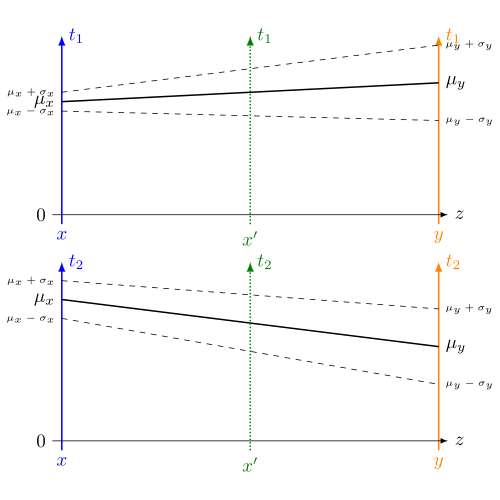

In [ ]:
%%tikz -f svg -s 500,500 -l calc

\begin{scope}
    \coordinate (x1) at (0,0);
    \coordinate (x2) at (200pt,0);
    \coordinate (x_dash) at (100pt,-5pt);
    \coordinate (x1axis) at ($(x1) - (0,5pt)$);
    \coordinate (x2axis) at ($(x2) - (0,5pt)$);
    \coordinate (height) at (0,100pt);

    \coordinate (mu_x) at ($(0,75pt) + (x1)$);
    \coordinate (sigma_x) at (0,10pt);
    \coordinate (mu_y) at ($(0,50pt) + (x2)$);
    \coordinate (sigma_y) at (0,20pt);

    \draw[-latex,blue,thick] (x1axis) node[below] {$x$} -- ($(x1axis) + (height)$) node[right] {$t_2$};
    \draw[-latex,orange,thick] (x2axis) node[below] {$y$} -- ($(x2axis) + (height)$) node[right] {$t_2$};

    \draw[-latex] ($(x1) - (5pt,0)$) node[left] {$0$} -- ($(x2) + (5pt,0)$) node[right] {$z$};

    \draw[thick] (mu_x) node[left] {$\mu_x$} -- (mu_y) node[right] {$\mu_y$};
    \draw[dashed] ($(mu_x) + (sigma_x)$) node[left] {\tiny$\mu_x + \sigma_x$} -- ($(mu_y) + (sigma_y)$) node[right] {\tiny$\mu_y + \sigma_y$};
    \draw[dashed] ($(mu_x) - (sigma_x)$) node[left] {\tiny$\mu_x - \sigma_x$} -- ($(mu_y) - (sigma_y)$) node[right] {\tiny$\mu_y - \sigma_y$};

    \draw[-latex,densely dotted,green!50!black,thick] (x_dash) node[below] {$x'$} -- ($(x_dash) + (height)$) node[right] {$t_2$};
\end{scope}

\begin{scope}[yshift=120pt]
    \coordinate (x1) at (0,0);
    \coordinate (x2) at (200pt,0);
    \coordinate (x_dash) at (100pt,-5pt);
    \coordinate (x1axis) at ($(x1) - (0,5pt)$);
    \coordinate (x2axis) at ($(x2) - (0,5pt)$);
    \coordinate (height) at (0,100pt);

    \coordinate (mu_x) at ($(0,60pt) + (x1)$);
    \coordinate (sigma_x) at (0,5pt);
    \coordinate (mu_y) at ($(0,70pt) + (x2)$);
    \coordinate (sigma_y) at (0,20pt);

    \draw[-latex,blue,thick] (x1axis) node[below] {$x$} -- ($(x1axis) + (height)$) node[right] {$t_1$};
    \draw[-latex,orange,thick] (x2axis) node[below] {$y$} -- ($(x2axis) + (height)$) node[right] {$t_1$};

    \draw[-latex] ($(x1) - (5pt,0)$) node[left] {$0$} -- ($(x2) + (5pt,0)$) node[right] {$z$};

    \draw[thick] (mu_x) node[left] {$\mu_x$} -- (mu_y) node[right] {$\mu_y$};
    \draw[dashed] ($(mu_x) + (sigma_x)$) node[left] {\tiny$\mu_x + \sigma_x$} -- ($(mu_y) + (sigma_y)$) node[right] {\tiny$\mu_y + \sigma_y$};
    \draw[dashed] ($(mu_x) - (sigma_x)$) node[left] {\tiny$\mu_x - \sigma_x$} -- ($(mu_y) - (sigma_y)$) node[right] {\tiny$\mu_y - \sigma_y$};

    \draw[-latex,densely dotted,green!50!black,thick] (x_dash) node[below] {$x'$} -- ($(x_dash) + (height)$) node[right] {$t_1$};
\end{scope}
